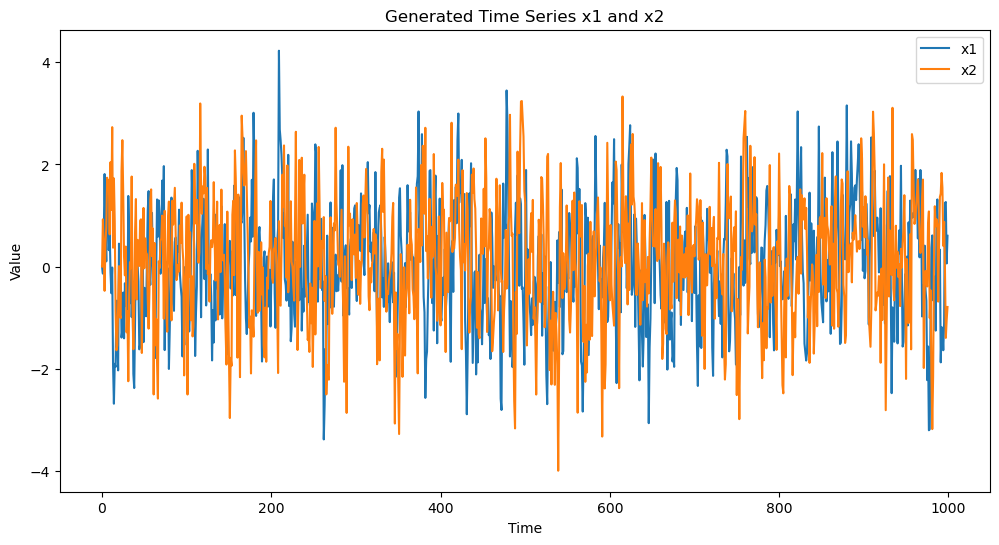

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Parameters
T = 1000  # Length of the time series
phi1 = 0.5  # Autoregressive coefficient for x1
phi2 = 0.4  # Autoregressive coefficient for x2
theta = 0.3  # Coefficient for the influence of x1 lagged by 3 on x2

# Initialize arrays to store the time series
x1 = np.zeros(T)
x2 = np.zeros(T)

# Generate white noise terms
e1 = np.random.normal(0, 1, T)  # Noise for x1
e2 = np.random.normal(0, 1, T)  # Noise for x2

# Generate x1 (AR(1) process)
for t in range(1, T):
    x1[t] = phi1 * x1[t - 1] + e1[t]

# Generate x2 (depends on its own past and x1's past lagged by 3)
for t in range(1, T):
    if t >= 3:
        x2[t] = phi2 * x2[t - 1] + theta * x1[t - 3] + e2[t]
    else:
        x2[t] = phi2 * x2[t - 1] + e2[t]

# Plot the generated time series
plt.figure(figsize=(12, 6))
plt.plot(x1, label='x1')
plt.plot(x2, label='x2')
plt.title('Generated Time Series x1 and x2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


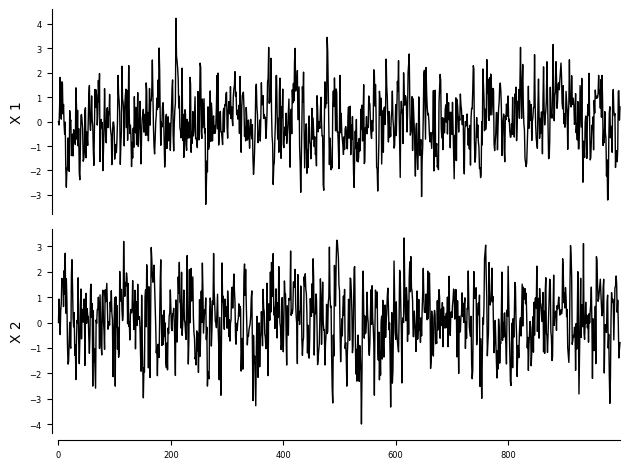

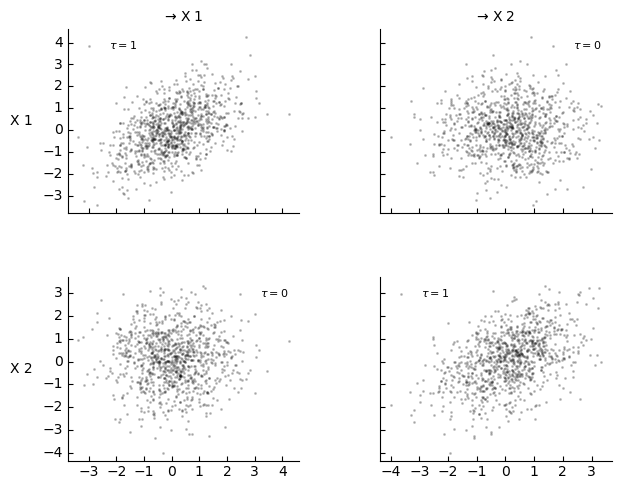


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


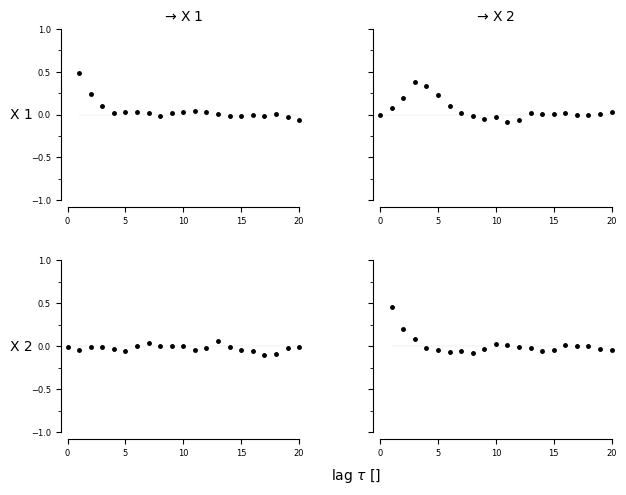

In [4]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI



# put x1 and x2 as columns in a ndarray called data
data = np.column_stack((x1, x2))

var_names = [r'X 1', r'X 2']
dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)


tp.plot_timeseries(dataframe); plt.show()

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 2
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X1 has 1 link(s):
    [pc_alpha = 0.05]
        (X1 -2): max_pval = 0.00000, |min_val| =  0.216

    Variable X2 has 2 link(s):
    [pc_alpha = 0.05]
        (X1 -3): max_pval = 0.00000, |min_val| =  0.384
        (X2 -2): max_pval = 0.00000, |min_val| =  0.166

##
## Step 2: MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 2
tau_max = 3
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01:

    Variable X1 has 1 link(s):
        (X1 -2): pval = 0.00000 | val =  0.246

    Variable X2 has 2 link(s):
        (X1 -3): pval = 0.00000 | val =  0.361
        (X2 -2): pval = 0.00000 | val =  0.152


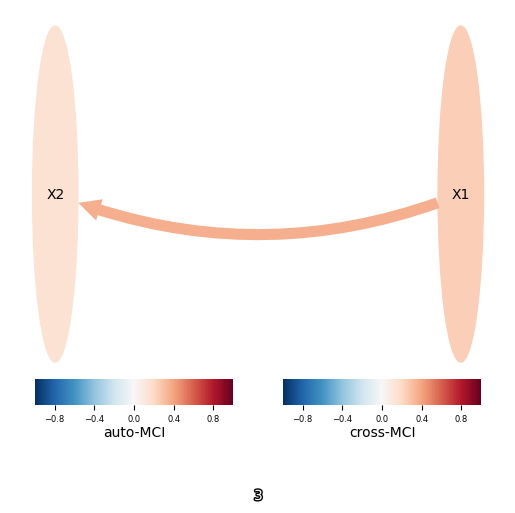

In [7]:

pcmci.verbosity = 1
tau_min=2
tau_max=3
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X 1 has 1 link(s):
    [pc_alpha = 0.05]
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.442

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 2 -1): max_pval = 0.00000, |min_val| =  0.416
        (X 1 -2): max_pval = 0.00000, |min_val| =  0.151

##
## Step 2: MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 1
tau_max = 2
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.442

    Variable X 2 has 1 link(s):
        (X 2 -1): pval = 0.00000 | val =  0.383
    Variable X 1 has 1 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.442
    Variable X 2 has 1 link(s):
        (

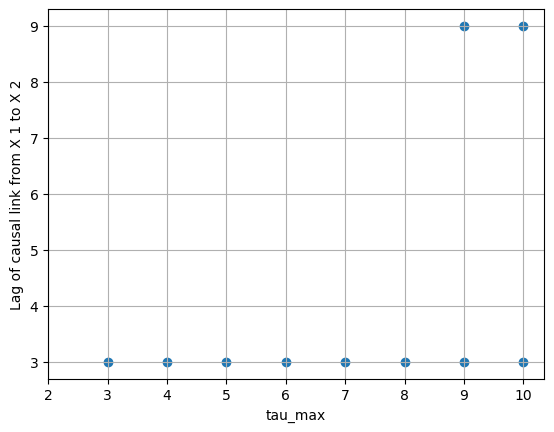

In [17]:
import matplotlib.pyplot as plt
from toolbox import post_processing_functions as ppf
import importlib
importlib.reload(ppf)

tau_min=1
# Lists to store tau_max values and corresponding lags
tau_max_values = []
lag_values = []

# Loop over tau_max from 2 to 10
for tau_max in range(2, 11):
    # Run PCMCI with the current tau_max
    results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)
    
    # Extract causal links
    N = results['p_matrix'].shape[0]
    results_text = ppf.print_significant_links(
        N, var_names, p_matrix=results['p_matrix'],
        val_matrix=results['val_matrix'], alpha_level=0.05
    )
    causal_links = ppf.parse_results_to_dict(results_text, var_names)
    
    # Check for causal links from 'X 1' to 'X 2'
    if 'X 2' in causal_links:
        for link in causal_links['X 2']:
            if link['cause'] == 'X 1':
                # Store the tau_max and corresponding lag
                tau_max_values.append(tau_max)
                lag_values.append(-link['lag'])  # Use negative lag for plotting
                
# Create the scatter plot
plt.scatter(tau_max_values, lag_values)
plt.xlabel('tau_max')
plt.ylabel('Lag of causal link from X 1 to X 2')
# plt.title('Causal Link Lags from X 1 to X 2 vs tau_max')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()



##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 10
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X 1 has 5 link(s):
    [pc_alpha = 0.4]
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.438
        (X 2 -7): max_pval = 0.08577, |min_val| =  0.055
        (X 2 -5): max_pval = 0.13917, |min_val| =  0.047
        (X 2 -1): max_pval = 0.22741, |min_val| =  0.039
        (X 1 -9): max_pval = 0.32454, |min_val| =  0.032

    Variable X 2 has 3 link(s):
    [pc_alpha = 0.2]
        (X 2 -1): max_pval = 0.00000, |min_val| =  0.387
        (X 1 -3): max_pval = 0.00000, |min_val| =  0.293
        (X 1 -9): max_pval = 0.10548, |min_val| =  0.052

##
## Step 2: MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 1
tau_max = 10
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01

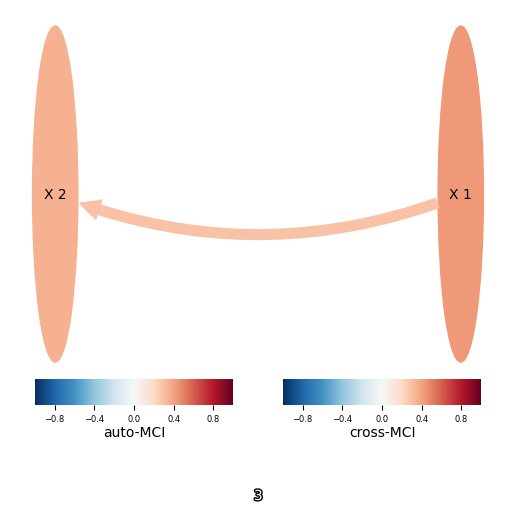

    Variable X 1 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.437
        (X 2 -5): pval = 0.02287 | val = -0.073
        (X 2 -7): pval = 0.04718 | val =  0.064
    Variable X 2 has 3 link(s):
        (X 2 -1): pval = 0.00000 | val =  0.357
        (X 1 -3): pval = 0.00000 | val =  0.290
        (X 1 -9): pval = 0.03548 | val = -0.067
''
'## Significant links at alpha = 0.05:'
'    Variable X 1 has 3 link(s):'
target var: X 1
'        (X 1 -1): pval = 0.00000 | val =  0.437'
Cause match found: <re.Match object; span=(8, 16), match='(X 1 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.437'>
['X', '1', '-1']
Cause name: X 1
Cause index: 0
'        (X 2 -5): pval = 0.02287 | val = -0.073'
Cause match found: <re.Match object; span=(8, 16), match='(X 2 -5)'>
Val match found: <re.Match object; span=(33, 47), match='| val = -0.073'>
['X', '2', '-5']
Cause name: X 2
Cause index: 1
'        (X 2 -7): pval = 0.04718 | val =  0.064'
Cause match found: <re.

{'X 1': [{'cause': 'X 1', 'lag': -1, 'pval': 0.0, 'val': 0.437},
  {'cause': 'X 2', 'lag': -5, 'pval': 0.02287, 'val': -0.073},
  {'cause': 'X 2', 'lag': -7, 'pval': 0.04718, 'val': 0.064}],
 'X 2': [{'cause': 'X 2', 'lag': -1, 'pval': 0.0, 'val': 0.357},
  {'cause': 'X 1', 'lag': -3, 'pval': 0.0, 'val': 0.29},
  {'cause': 'X 1', 'lag': -9, 'pval': 0.03548, 'val': -0.067}]}

In [16]:


pcmci.verbosity = 1
tau_min=1
tau_max=10
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()

from toolbox import post_processing_functions as ppf
import importlib
importlib.reload(ppf)


N = results['p_matrix'].shape[0]
# var_names = var_names

  
results_text=ppf.print_significant_links(N, var_names, p_matrix=results['p_matrix'],
                                 val_matrix=results['val_matrix'],
                                 alpha_level=0.05)

causal_links = ppf.parse_results_to_dict(results_text, var_names)
causal_links


In [15]:
causal_links

{'X 1': [{'cause': 'X 1', 'lag': -1, 'pval': 0.0, 'val': 0.44},
  {'cause': 'X 2', 'lag': -5, 'pval': 0.02352, 'val': -0.073},
  {'cause': 'X 2', 'lag': -7, 'pval': 0.03389, 'val': 0.068}],
 'X 2': [{'cause': 'X 2', 'lag': -1, 'pval': 0.0, 'val': 0.356},
  {'cause': 'X 1', 'lag': -3, 'pval': 0.0, 'val': 0.287},
  {'cause': 'X 1', 'lag': -9, 'pval': 0.0379, 'val': -0.067}]}